1st Step: Setup and load data

In [ ]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [59]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)


TensorFlow version: 2.19.0
OpenCV version: 4.11.0
Matplotlib version: 3.8.0


In [ ]:
#Enabling usage of GPU on MAC

%pip install tensorflow-macos
%pip install tensorflow-metal


In [227]:
import tensorflow as tf
import os

In [228]:
# Avoid Out of Memory errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print(gpus)

[]


In [ ]:
%pip install kagglehub

In [39]:
#Import data sets:

#Happy people

import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:02<00:00, 25.2MB/s]

Extracting files...


Path to dataset files: /Users/aymenoumali/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [40]:
import shutil
import os

# Define source and destination paths
src = "/Users/aymenoumali/.cache/kagglehub/datasets/msambare/fer2013/versions/1"
dst = "/Users/aymenoumali/Documents/Internship/CNN/data"

# Create destination folder if it doesn't exist
os.makedirs(dst, exist_ok=True)

# Move the entire content (recursively)
for item in os.listdir(src):
    s = os.path.join(src, item)
    d = os.path.join(dst, item)
    shutil.move(s, d)

print("Dataset moved to:", dst)

shutil.rmtree(src)
print("Original dataset cache deleted.")

Dataset moved to: /Users/aymenoumali/Documents/Internship/CNN/data
Original dataset cache deleted.


In [43]:
#Remove dodgy images

import cv2
import imghdr

In [50]:
data_dir = os.path.join('data', 'train')
image_class = os.listdir(data_dir)

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image) #as a np array

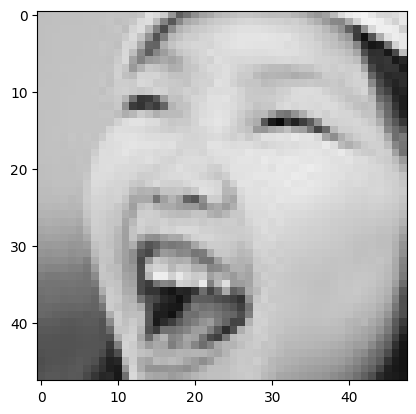

In [63]:
img = cv2.imread(os.path.join(data_dir, 'happy/Training_50580.jpg'))
plt.imshow(img)

In [66]:
#Load the images

tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [ ]:
import numpy as np
from matplotlib import pyplot as pyplot

In [69]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [139]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'train'))

Found 28709 files belonging to 7 classes.


In [141]:
data_iterator = data.as_numpy_iterator()

In [142]:
batch = data_iterator.next()

#Images represented as np arrays
batch[0].shape

(32, 256, 256, 3)

In [143]:
#classes names are associated to numbers
batch[1]

array([3, 0, 6, 3, 0, 0, 6, 0, 0, 4, 2, 0, 0, 0, 6, 6, 4, 1, 0, 0, 4, 0,
       3, 5, 0, 3, 2, 0, 3, 2, 4, 3], dtype=int32)

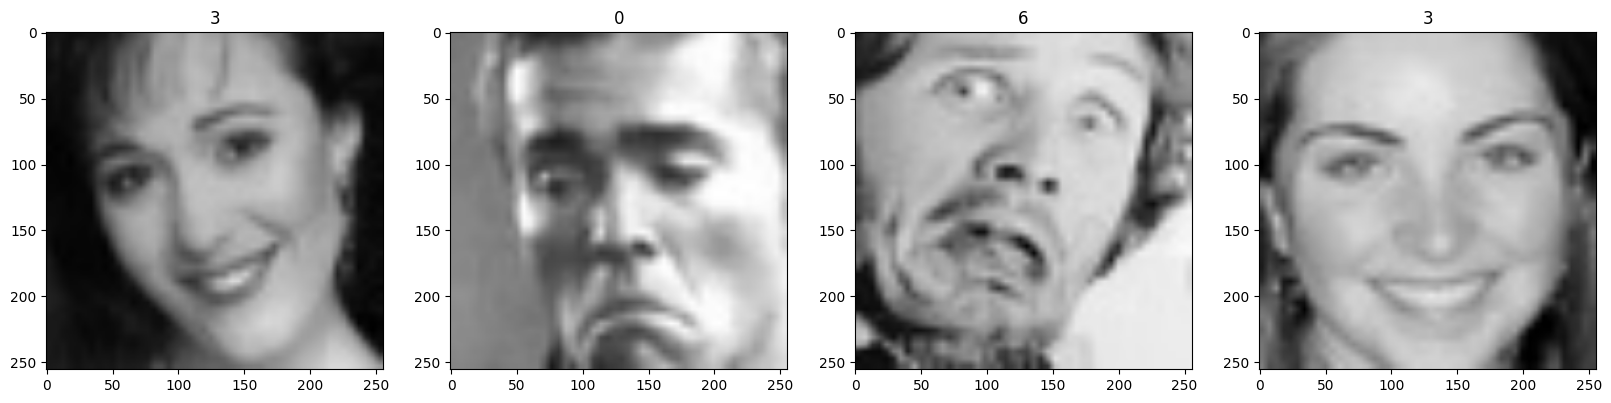

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx]. title.set_text(batch[1][idx])

#class 0 = angry ppl
#class 1 = disgust
#class 2 = fear
#class 3 = happy
#class 4 = neutral
#class 5 = sad
#class 6 = surprise

2nd Step: Process data

In [145]:
scaled = batch[0] / 255
scaled

array([[[[0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.10196079, 0.10196079, 0.10196079],
         [0.10196079, 0.10196079, 0.10196079]

In [172]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'train'))
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()


Found 28709 files belonging to 7 classes.


In [188]:
scaled_iterator.next()[0].max()

1.0

In [189]:
scaled_iterator.next()[0].min()

0.0

In [192]:
#Data here is already split in training and test, in case it's not done

len(data)
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [199]:
#The data I have are only separated in two, let's seperate train in two with a validation part while we train the modele
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.2)

In [207]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

#test, let's take them from a new dataset
test = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'test')).map(lambda x,y: (x/255, y))

print(len(train), len(val), len(test))


Found 7178 files belonging to 7 classes.
718 179 225


3rd Step: Building the model

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import Input


In [ ]:
#Build the model
model = Sequential()

#Set 3 convolutional layers with a maxpooling layers
model.add(Input(shape=(256, 256, 3)))  # Explicit input layer
model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())
# - 16 filters of size 3x3
# - Stride of 1 (standard sliding)
# - ReLU activation
# - Input image shape: 256x256 pixels with 3 color channels (RGB)

model.add(Conv2D(32, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())
# - 32 filters to learn more complex patterns
# - Same 3x3 size and ReLU activation


model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())
# - Back to 16 filters

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(7, activation="softmax"))

#Loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [216]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,167 (14.11 MB)

 Trainable params: 3,698,167 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [229]:
#Train the machine learning model
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 190s 265ms/step - accuracy: 0.3759 - loss: 1.6045 - val_accuracy: 0.4124 - val_loss: 1.4901
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 186s 259ms/step - accuracy: 0.4693 - loss: 1.3857 - val_accuracy: 0.4403 - val_loss: 1.4422
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 211s 293ms/step - accuracy: 0.5849 - loss: 1.1142 - val_accuracy: 0.4625 - val_loss: 1.5393
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 221s 308ms/step - accuracy: 0.7358 - loss: 0.7353 - val_accuracy: 0.4366 - val_loss: 2.2127
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 215s 299ms/step - accuracy: 0.8633 - loss: 0.3982 - val_accuracy: 0.4457 - val_loss: 2.8582
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 210s 292ms/step - accuracy: 0.9285 - loss: 0.2182 - val_accuracy: 0.4509 - val_loss: 3.6874
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 232s 323ms/step - accuracy: 0.9541 - loss: 0.1445 - val_accuracy: 0.4441 - val_loss: 3.6951
Epoch 8/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 216s 301ms/step - accuracy: 0.9642 -